In [1]:
#Import Block

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pylab as lab
import sys
import time
from specutils import Spectrum1D
import astropy.units as u
from specutils.manipulation import (box_smooth, gaussian_smooth, trapezoid_smooth)
He = False
HeII = False
varHe = "Untestable"
varHeII = "Untestable"
print ("import done")
fileName = 'wisej1856_090721_merged.txt'
print ("""Star Guesses:
TYC 3740-1791-1: EM candiate, A Star Guess
WISE J185608.58-163255.1: Cool Candidate, G Star Guess
WISE J194127.64+385155.3: Cool Candidate, K Star Guess
TYC 2670-214-1 EM Candidate, A or F Star Guess""")

import done
Star Guesses:
TYC 3740-1791-1: EM candiate, A Star Guess
WISE J185608.58-163255.1: Cool Candidate, G Star Guess
WISE J194127.64+385155.3: Cool Candidate, K Star Guess
TYC 2670-214-1 EM Candidate, A or F Star Guess


In [2]:
    #File Set Up Block

tyc2670 = 'TYC2670_090721_norm.txt'
tyc3740 = 'tyc3740_091021_norm.txt'
wisej1856 ='WISEJ1856_090721_norm.txt'
wisej1941 = 'WISEJ1941_090721_norm.txt'



    
def fileSetup(fileName,guassFactor):
        # global waves
        # global fluxs
        # global spec1_gsmooth
        # global spec1_bsmooth
        # global spec1_tsmooth
        # global spec1d
        # global fileTitle
        
       
        
        waves,fluxs = np.genfromtxt(fileName,unpack=True)
        #waves= wave10/10
    
        spec1d = Spectrum1D(spectral_axis=waves*u.AA, flux = fluxs*u.Jy)

        spec1_bsmooth = box_smooth(spec1d, width=3)
        spec1_gsmooth = gaussian_smooth(spec1d, stddev=guassFactor)
        spec1_tsmooth = trapezoid_smooth(spec1d, width=3)
        #print ("Do you want to give '", fileName,"'a nickname?")
        time.sleep(1)
        """wantNickName =(input("Yes/No"))
        if wantNickName == "Yes":
            nickName = (input("Enter your nickname for this star"))
            fileName = nickName
            fileTitle = fileName
        if wantNickName == "No":
            fileTitle = fileName
        else:
            fileTitle = fileName"""# manual nickname entry
        if fileName == tyc2670:
            fileTitle="TYC 2670"
        if fileName==tyc3740:
            fileTitle="TYC 3740"
        if fileName == wisej1856:
            fileTitle ="WISE J1856"
        if fileName == wisej1941:
            fileTitle = "WISE J1941"
        print(fileTitle,", file set up done")
        return waves,fluxs,spec1_gsmooth,fileTitle

In [3]:
def bunny():
    print(""" Have a bunny             
                      (\___/)
                      (=^.^=)
                      (")_(")   """)

In [4]:
CaTriplet3Wave=8662 
CaTriplet2Wave=8542
CaTriplet1Wave=8498
H_AlphaWave=6563
NaDoublet2Wave=5895
NaDoublet1Wave=5890
H_BetaWave=4861
He=4481
H_GammaWave=4340
G_BandWave=4308
FeWave=4325

def ListofSpectralFeatures():
    print("""
CaTriplet3Wave=866.2 
CaTriplet2Wave=854.2
CaTriplet1Wave=849.8
H_AlphaWave=656.3
NaDoublet2Wave=589.5
NaDoublet1Wave=589.0
H_BetaWave=486.1
H_GammaWave=434.0
G_BandWave=430.8
FeWave=432.5
""")


In [11]:
 def fullSpectra(wave,flux,spec1_gsmooth,Focus,starGuess,lw,leftLim,rightLim,bottomLim,topLim,fileTitle):   
    x = wave
    y = flux
    print(Focus)
    # global title
    # global waveG
    # global fluxG
    focus=Focus
    title1 = starGuess + " Candidate "+fileTitle+" "+focus
    title2 = title1+" (Smoothed)"
    fig, axes = plt.subplots(2, 1, figsize=(16, 10),dpi=300)
    axes[0].set_title(title1,color='Gold')
    axes[0].set_xlabel("Wave",color='gold') 
    axes[0].set_ylabel("Brightness", color='gold')
    #plt.figure(facecolor='Black')
    axes[0].set_facecolor('Black')
    axes[0].plot(wave,flux,color='mediumspringgreen')
    # if CaTriplet3Wave >= leftLim and CaTriplet3Wave <= rightLim:
    #     axes[0].axvline(x=CaTriplet3Wave,color="red",linewidth=lw)#Ca Triplet 3
    # if CaTriplet2Wave >= leftLim and CaTriplet2Wave <= rightLim:
    #     axes[0].axvline(x=CaTriplet2Wave,color="red",linewidth=lw)#Ca Triplet 2
    # if CaTriplet1Wave >= leftLim and CaTriplet1Wave <= rightLim:
    #     axes[0].axvline(x=CaTriplet1Wave,color="red",linewidth=lw)#Ca Triplet 1
    # if (8620 >= leftLim and 8620 <= rightLim):
    #     axes[0].text(8620,0.4,"Ca Triplet" ,fontweight='bold',color ="red")
    if H_AlphaWave >= leftLim and H_AlphaWave <= rightLim:
         axes[0].axvline(x=H_AlphaWave,color="coral",linewidth=lw,)#Ha
         axes[0].text(6565,0.7, " H-α",fontweight='bold',color="coral")
    # if NaDoublet1Wave >= leftLim and NaDoublet2Wave <= rightLim and Focus != "Balmer Series":
    #     axes[0].axvline(x=NaDoublet2Wave,color="darkgoldenrod",linewidth=lw)#Na Doublet 2
    #     axes[0].axvline(x=NaDoublet1Wave,color="darkgoldenrod",linewidth=lw)#Na Doublet 1
    #     axes[0].text(5909,0.2,"Na Doublet", fontweight='bold',color ="darkgoldenrod")
    if H_BetaWave >= leftLim and H_BetaWave <= rightLim:
        axes[0].axvline(x=H_BetaWave,color="lime",linewidth=lw)#Hb
        axes[0].text(4866,0.7, "H-β", fontweight='bold',color="lime")
    # if He >= leftLim and He <= rightLim:
    #     axes[0].axvline(x=He,color="green",linewidth=lw)#Hb
    #     axes[0].text(4483,0.25, "He", fontweight='bold', color="green")
    if H_GammaWave >= leftLim and H_GammaWave <= rightLim :
        axes[0].axvline(x=H_GammaWave,color="deepskyblue",linewidth=lw)#Hg
        axes[0].text(4343,0.7, "H-γ", fontweight='bold', color="deepskyblue") 
    # if G_BandWave >= leftLim and G_BandWave <= rightLim and Focus != "Balmer Series":
    #     axes[0].axvline(x=G_BandWave,color="violet",linewidth=lw)# G-Band(?)
    #     if leftLim <=4050:
    #         axes[0].text(4080,0.05,"G-band",color="violet") # double check this is actually the g-band
    #     if leftLim>=405:
    #         axes[0].text(4310,0.05,"G-band",color="violet") # double check this is actually the g-band
    # if FeWave >= leftLim and FeWave <= rightLim and Focus != "Balmer Series":
    #     axes[0].axvline(x=FeWave,color="Magenta",linewidth=lw)#Fe
    #     axes[0].text(4330,0.025,"Fe 432.5",color="Magenta") 
    axes[0].set_xlim(leftLim,rightLim)
    axes[0].set_ylim(bottomLim,topLim)
    plt.tight_layout()
    axes[1].set_title(title2, color='gold')
    axes[1].set_facecolor('black')
    
    # if CaTriplet3Wave >= leftLim and CaTriplet3Wave <= rightLim:
    #     axes[1].axvline(x=CaTriplet3Wave,color="red",linewidth=lw)#Ca Triplet 3
    # if CaTriplet2Wave >= leftLim and CaTriplet2Wave <= rightLim:
    #     axes[1].axvline(x=CaTriplet2Wave,color="red",linewidth=lw)#Ca Triplet 2
    # if CaTriplet1Wave >= leftLim and CaTriplet1Wave <= rightLim:
    #     axes[1].axvline(x=CaTriplet1Wave,color="red",linewidth=lw)#Ca Triplet 1
    # if (8620 >= leftLim and 8620 <= rightLim):
    #     axes[1].text(8620,0.4,"Ca Triplet" ,fontweight='bold',color ="coral")
    if H_AlphaWave >= leftLim and H_AlphaWave <= rightLim:
        axes[1].axvline(x=H_AlphaWave,color="coral",linewidth=lw,)#Ha
        axes[1].text(6565,0.7, " H-α",fontweight='bold', color="coral")
    # if NaDoublet1Wave >= leftLim and NaDoublet2Wave <= rightLim and Focus != "Balmer Series":
    #     axes[1].axvline(x=NaDoublet2Wave,color="darkgoldenrod",linewidth=lw)#Na Doublet 2
    #     axes[1].axvline(x=NaDoublet1Wave,color="darkgoldenrod",linewidth=lw)#Na Doublet 1
    #     axes[1].text(5900,0.2,"Na Doublet", fontweight='bold', color ="darkgoldenrod")
    if H_BetaWave >= leftLim and H_BetaWave <= rightLim:
        axes[1].axvline(x=H_BetaWave,color="lime",linewidth=lw)#Hb
        axes[1].text(4865,0.7, "H-β", fontweight='bold', color="lime")
    # if He >= leftLim and He <= rightLim:
    #     axes[1].axvline(x=He,color="green",linewidth=lw)#Hb
    #     axes[1].text(4481,0.25, "He", fontweight='bold', color="green")
    if H_GammaWave >= leftLim and H_GammaWave <= rightLim :
        axes[1].axvline(x=H_GammaWave,color="deepskyblue",linewidth=lw)#Hg
        axes[1].text(4342,0.7, "H-γ", fontweight='bold', color="deepskyblue") 
    # if G_BandWave >= leftLim and G_BandWave <= rightLim and Focus != "Balmer Series":
    #     axes[1].axvline(x=G_BandWave,color="violet",linewidth=lw)# G-Band(?)
    #     if leftLim <=405:
    #         axes[1].text(408.0,0.05,"G-band",color="violet") # double check this is actually the g-band
    #     if leftLim>=405:
    #         axes[1].text(431,0.05,"G-band",color="violet") # double check this is actually the g-band
    # if FeWave >= leftLim and FeWave <= rightLim and Focus != "Balmer Series":
    #     axes[1].axvline(x=FeWave,color="Magenta",linewidth=lw)#Fe
    #     axes[1].text(433,0.025,"Fe 432.5",color="Magenta") 
    
    axes[1].set_xlabel("Wave") 
    axes[1].set_ylabel("Birghtness") 

    axes[1].plot(spec1_gsmooth.spectral_axis, spec1_gsmooth.flux, color='dodgerblue')  
    axes[1].set_xlim(leftLim,rightLim)
    axes[1].set_ylim(bottomLim,topLim)#emission line zoom in one
    #axes[1].set_xlim(625,635)#emission line zoom in two
    #axes[1].set_xlim(875,900)#emission line zoom in 3
    #axes[1].axvline(x=1043,color="darkviolet",linewidth=0.75,ls="dashed")
        # Set the borders to a given color...
    for ax in axes:
        ax.tick_params(color='gold', labelcolor='gold')
        for spine in ax.spines.values():
            spine.set_edgecolor('gold')
    plt.tight_layout()
    
    saveName = title1+".png"
  
    plt.savefig(saveName,bbox_inches="tight")
    plt.show
    
    waveG = spec1_gsmooth.spectral_axis
    fluxG = spec1_gsmooth.flux
    #return waveG 
    #return fluxG
    #return lw
    #return title

In [12]:
#waves,fluxs,spec1_gsmooth,fileTitle = fileSetup(tyc2670,24)


In [13]:
#fullSpectra(waves,fluxs,spec1_gsmooth,"Full Spectra","EM",0.6,400,1000,fileTitle)

In [14]:
def RapidChartSpitter(fileName,guassFactor,Focus,starGuess,lw,leftLim,rightLim,bottomLim,topLim):
    waves,fluxs,spec1_gsmooth,fileTitle= fileSetup(fileName,guassFactor)
    fullSpectra(waves,fluxs,spec1_gsmooth,Focus,starGuess,lw,leftLim,rightLim,bottomLim,topLim,fileTitle)
 

 Have a bunny             
                      (\___/)
                      (=^.^=)
                      (")_(")   
TYC 2670 , file set up done
Balmer Series
TYC 3740 , file set up done
Balmer Series
WISE J1856 , file set up done
Balmer Series
WISE J1941 , file set up done
Balmer Series
 Have a bunny             
                      (\___/)
                      (=^.^=)
                      (")_(")   
TYC 2670 , file set up done
H-α
TYC 3740 , file set up done
H-α
WISE J1856 , file set up done
H-α
WISE J1941 , file set up done
H-α
 Have a bunny             
                      (\___/)
                      (=^.^=)
                      (")_(")   
 Have a bunny             
                      (\___/)
                      (=^.^=)
                      (")_(")   
 Have a bunny             
                      (\___/)
                      (=^.^=)
                      (")_(")   


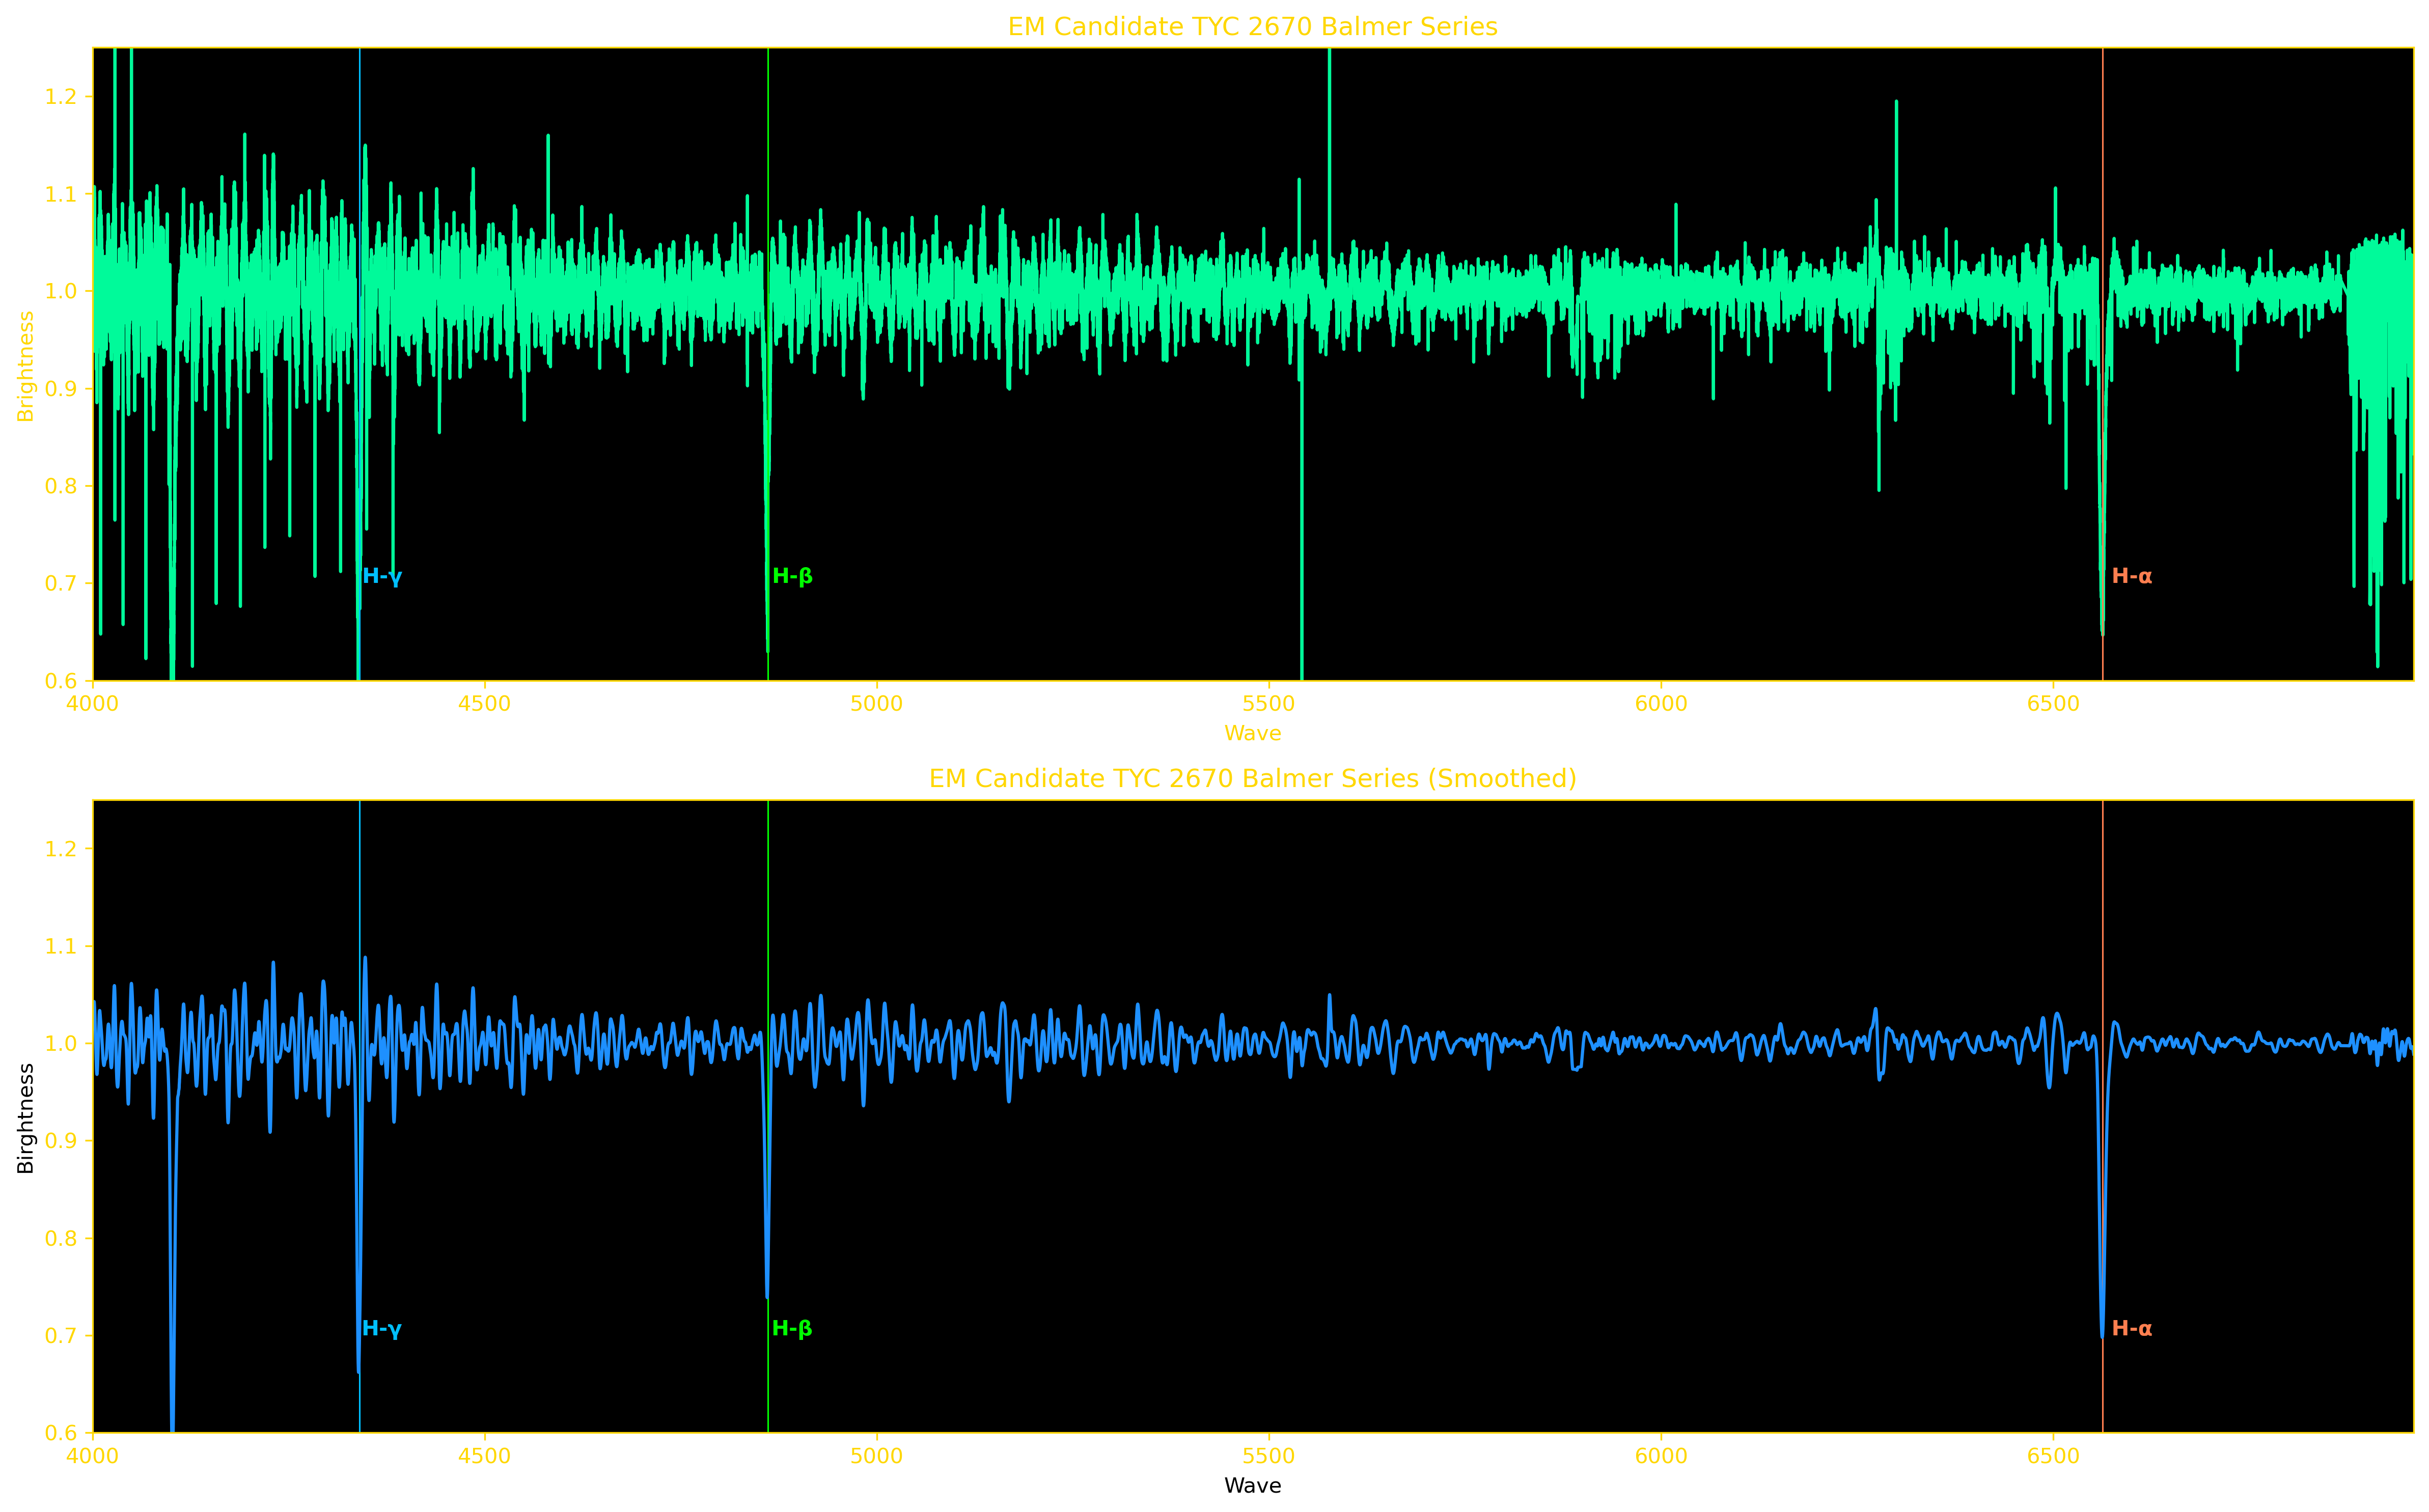

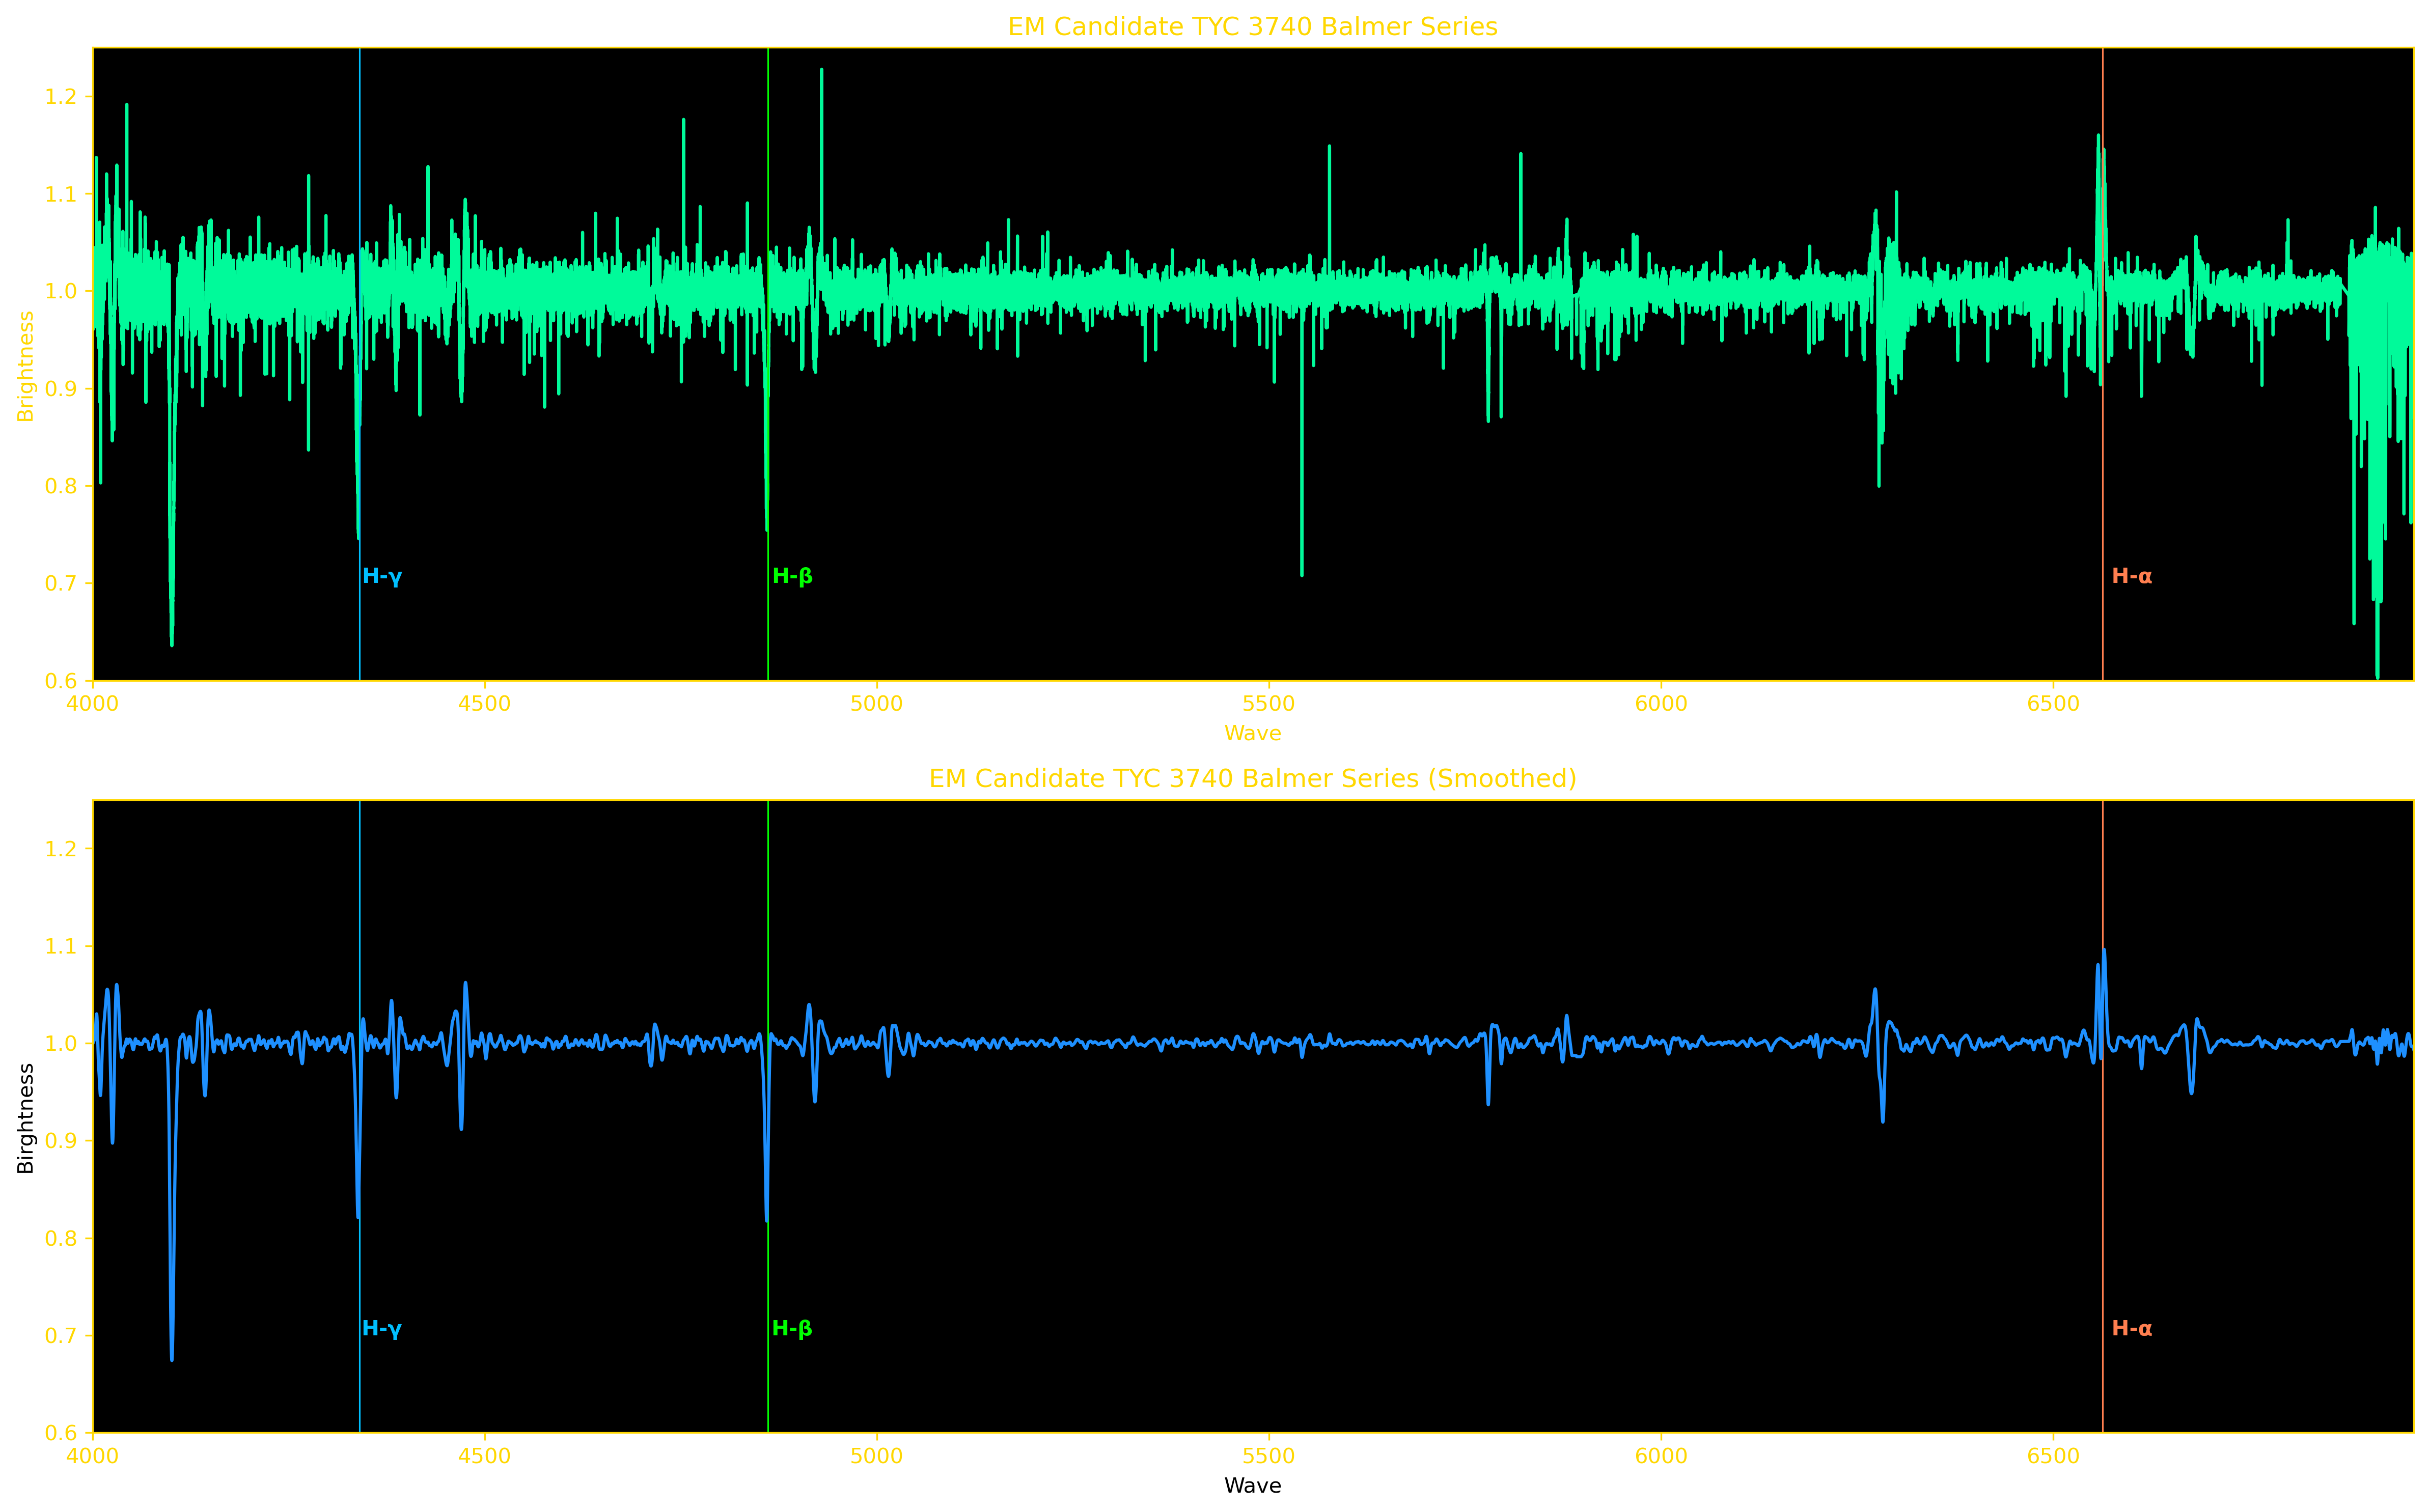

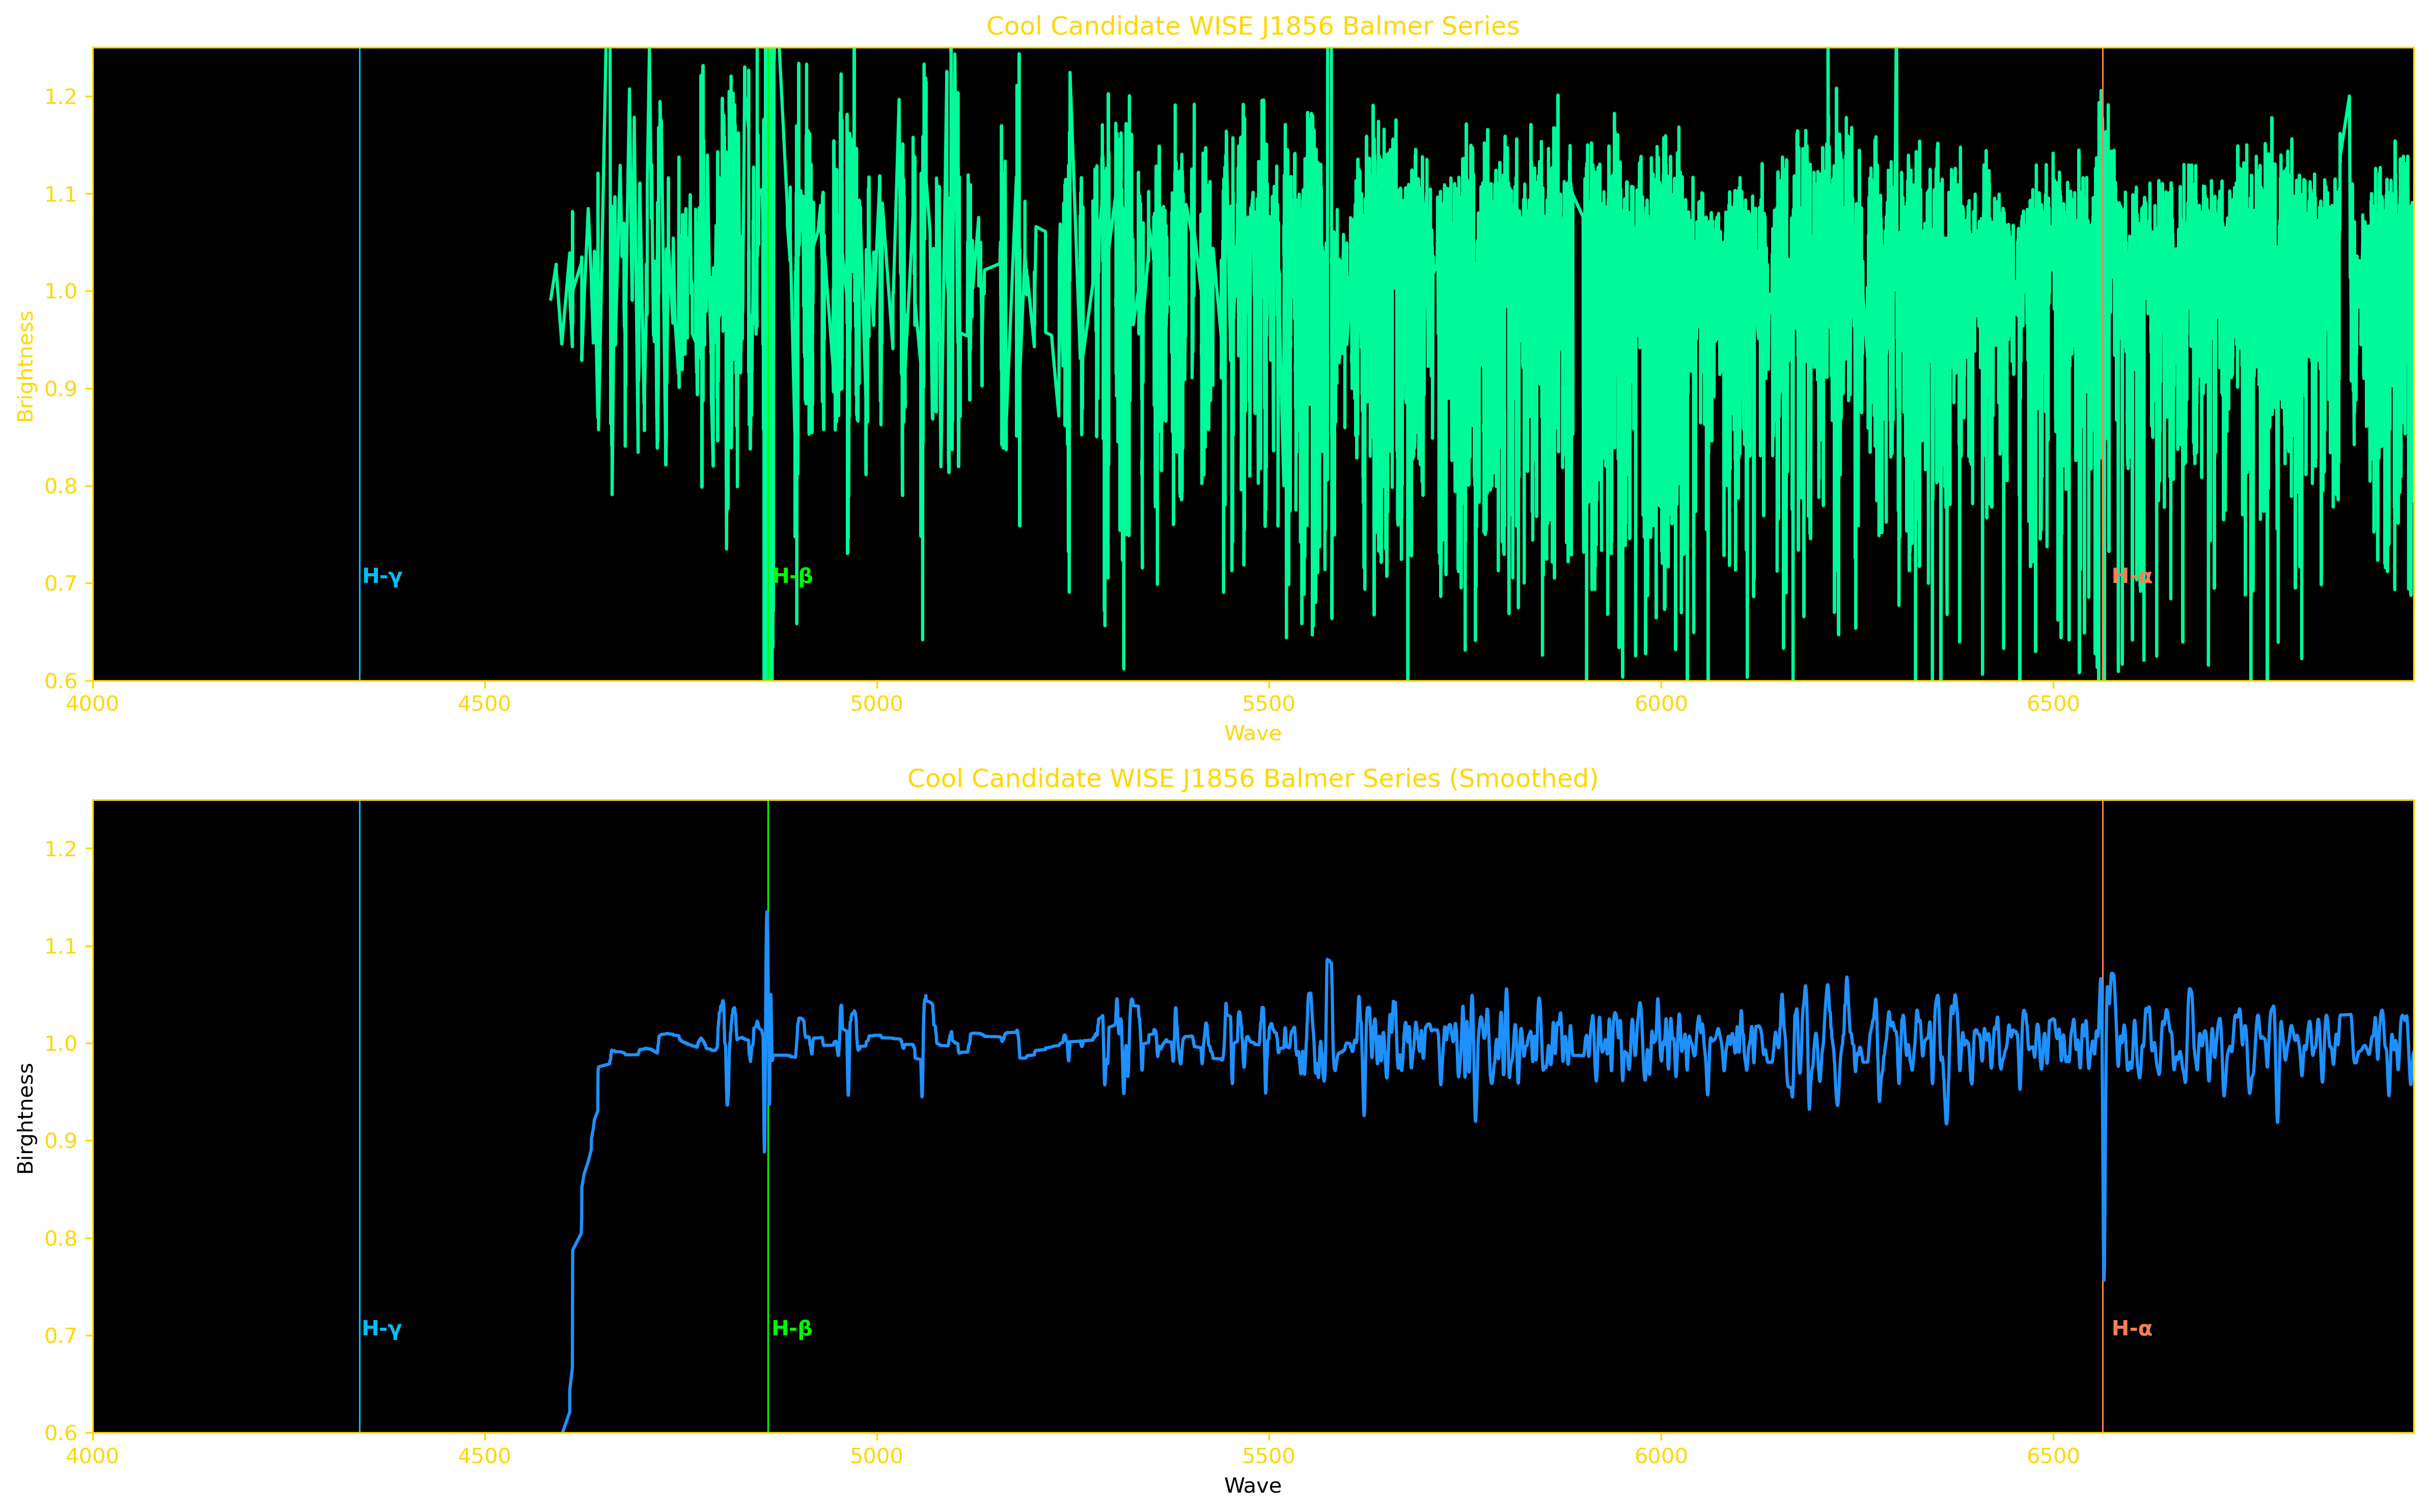

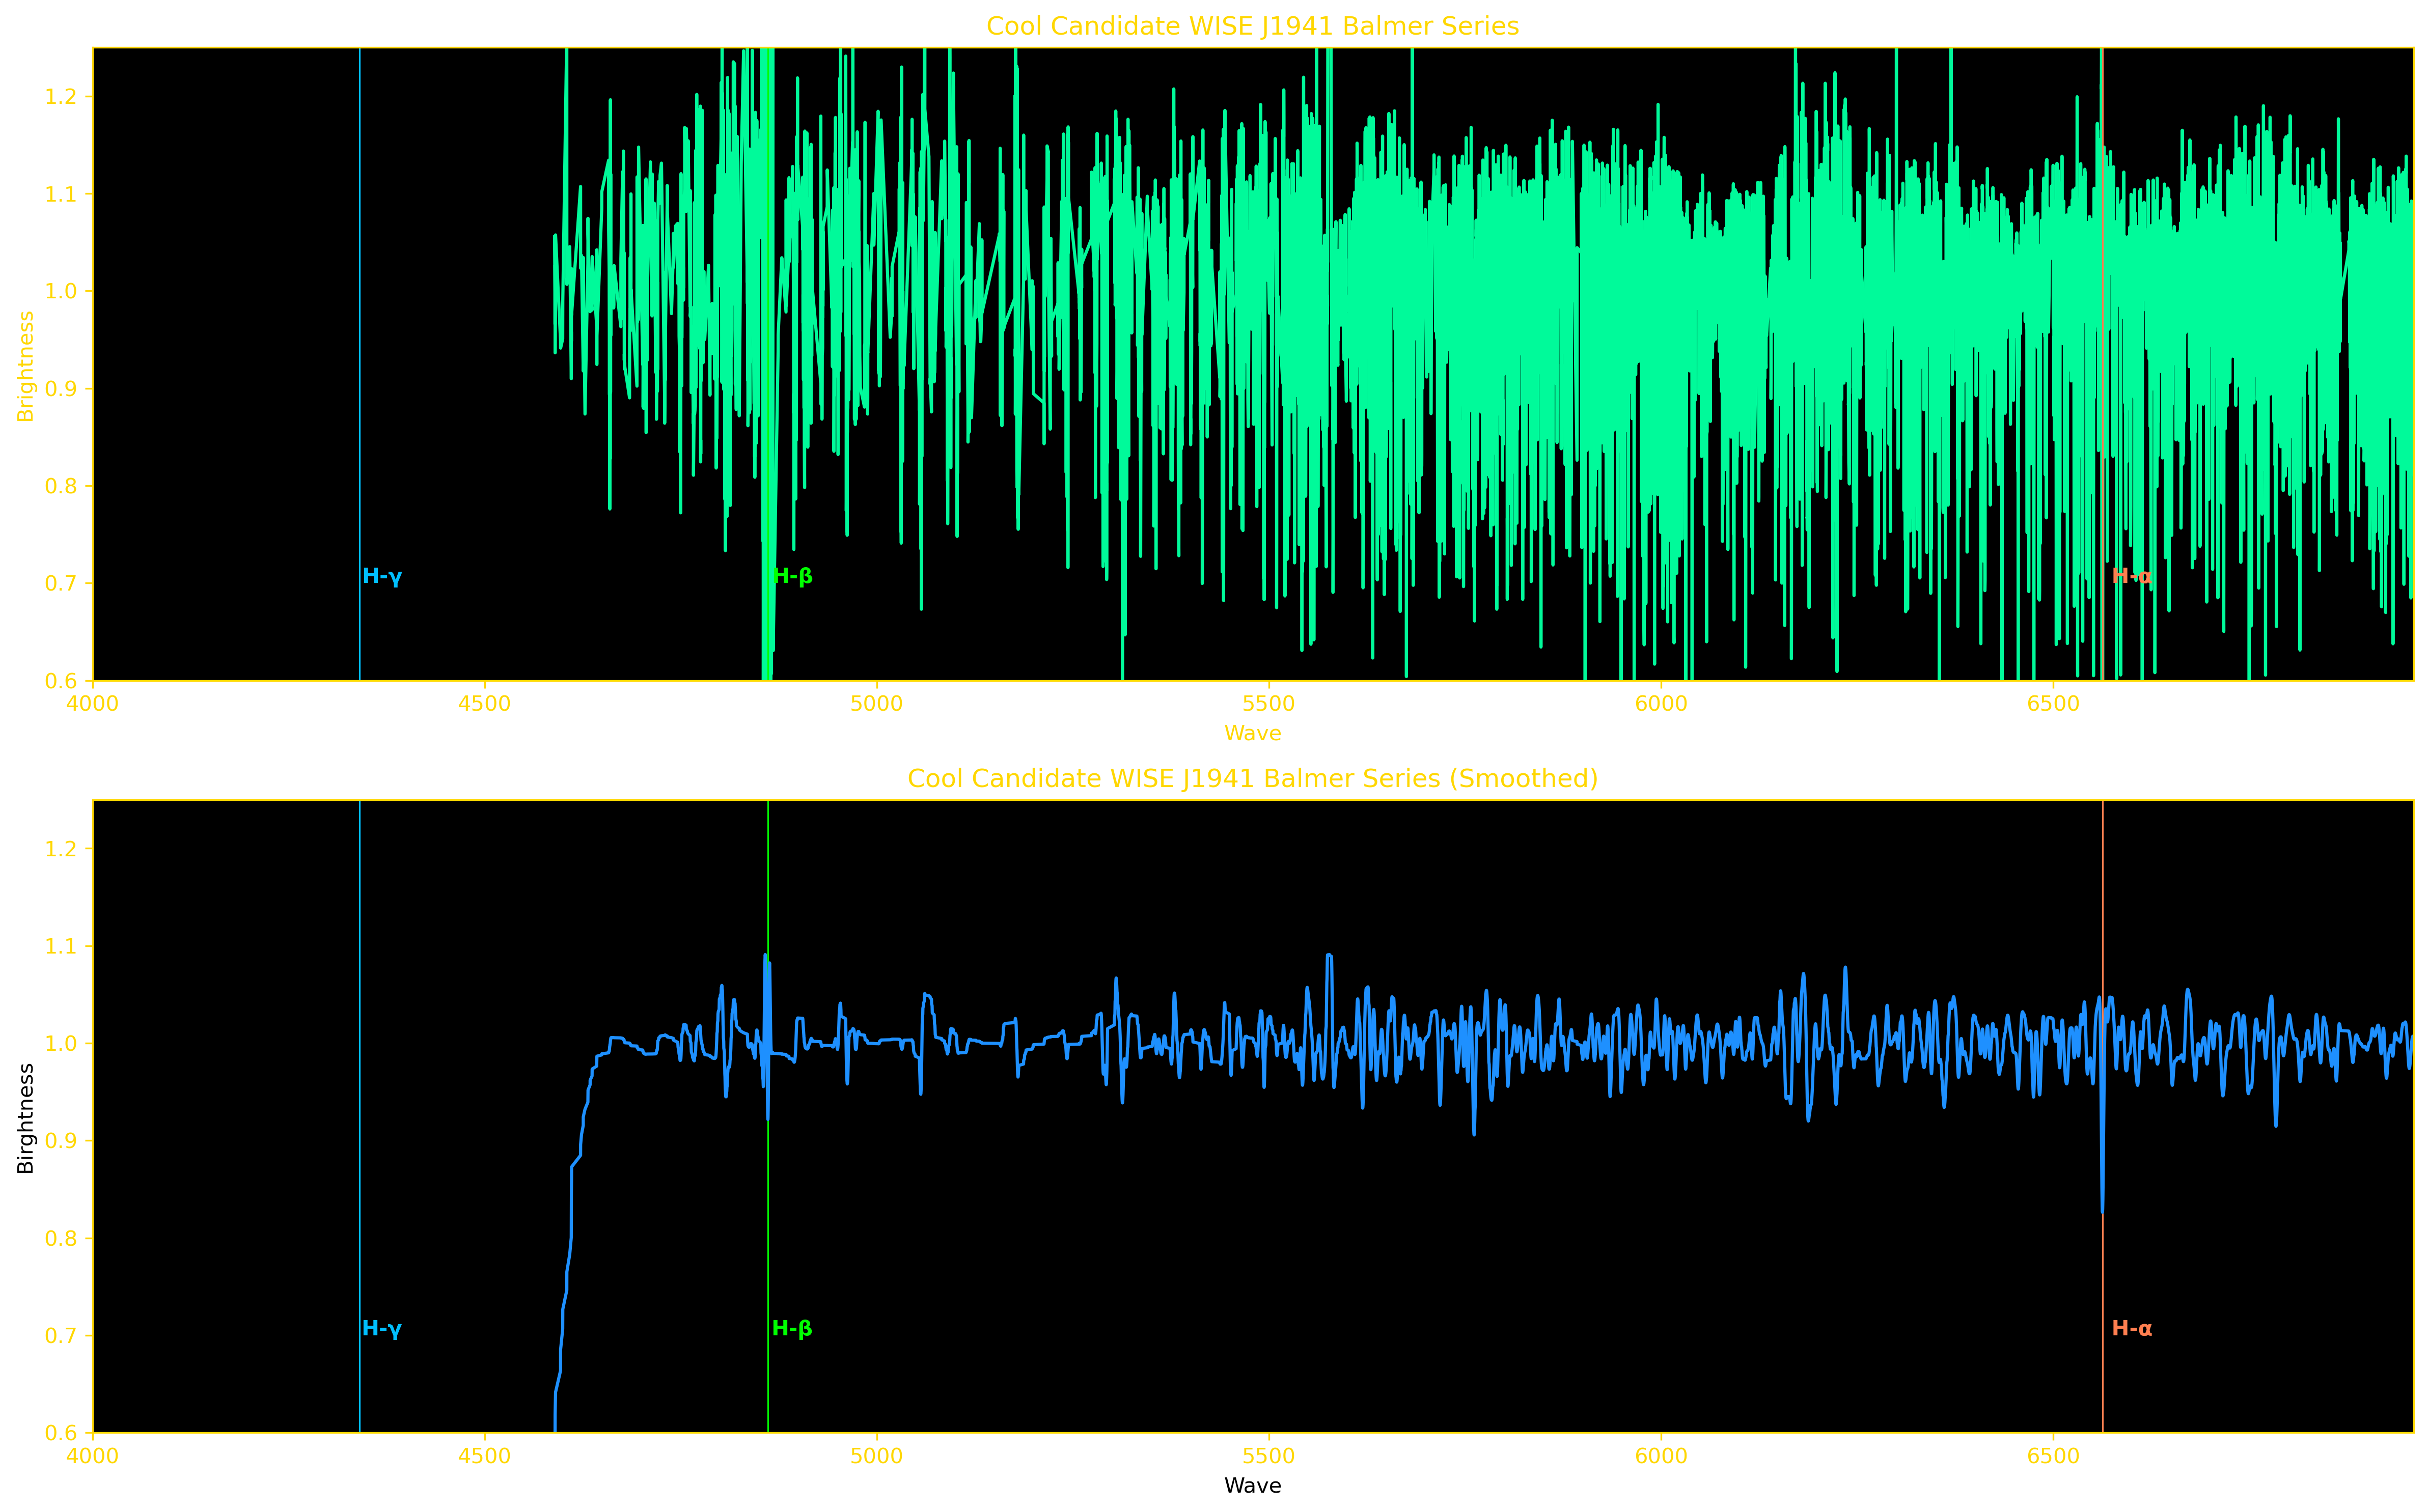

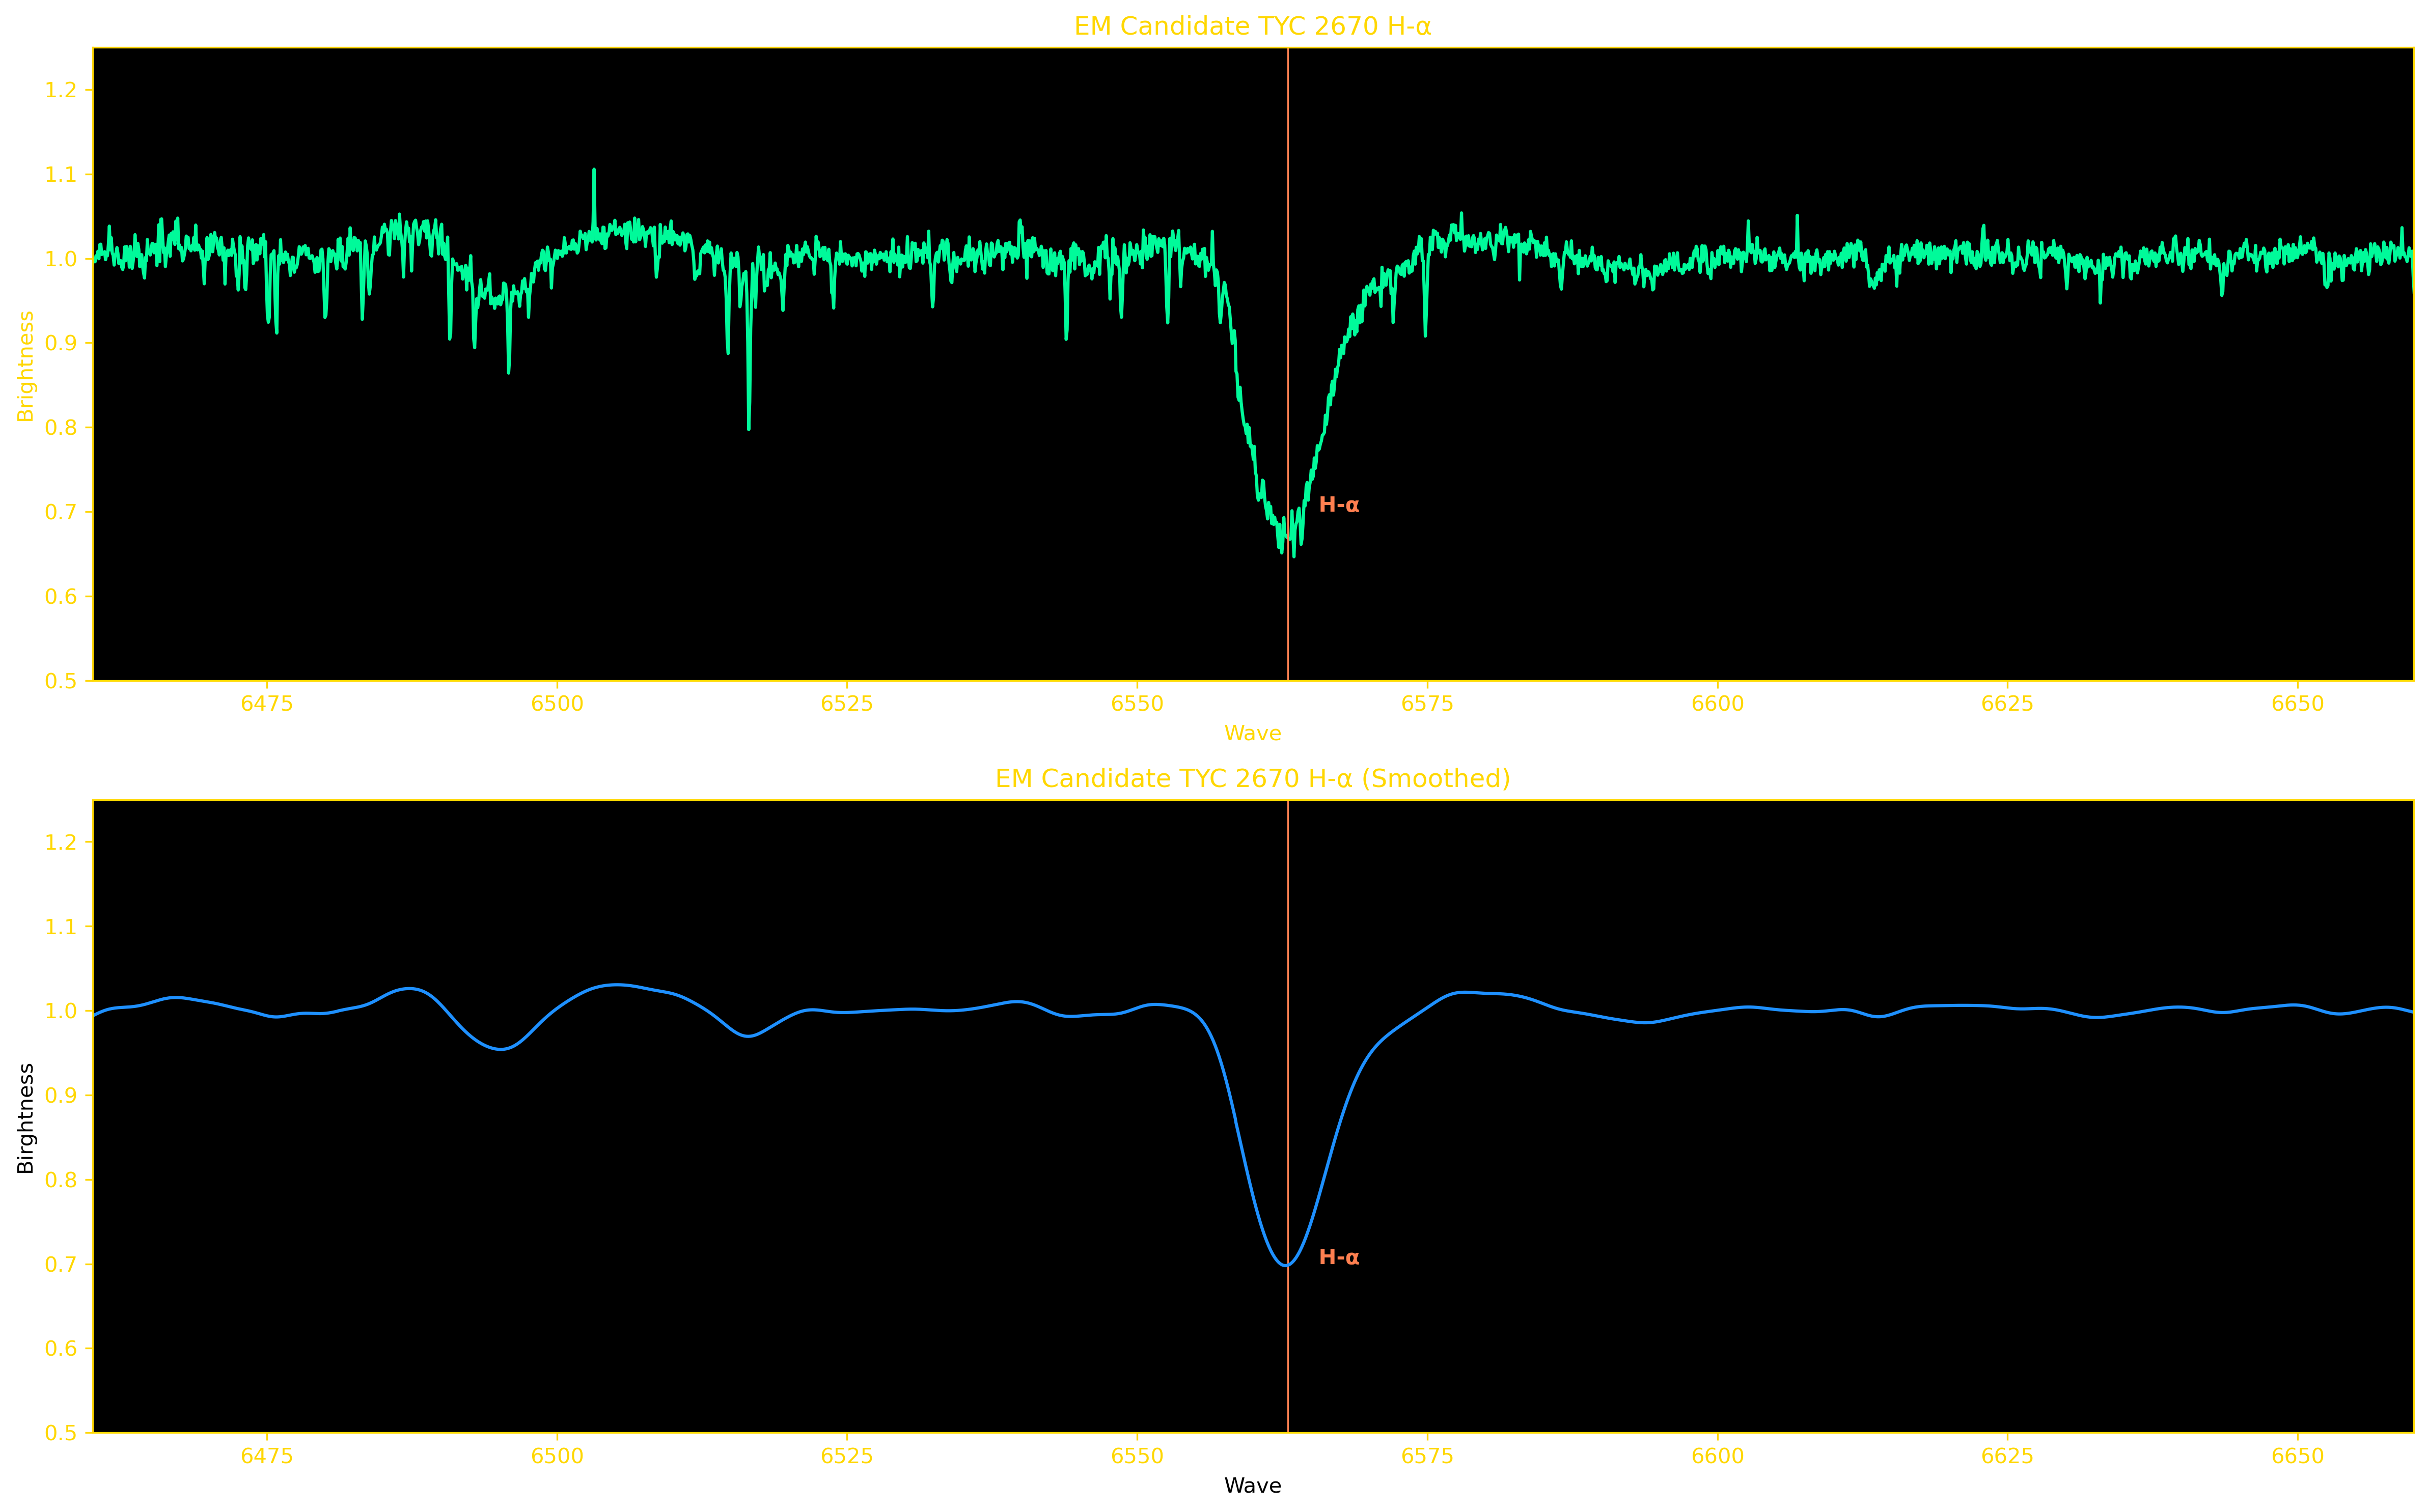

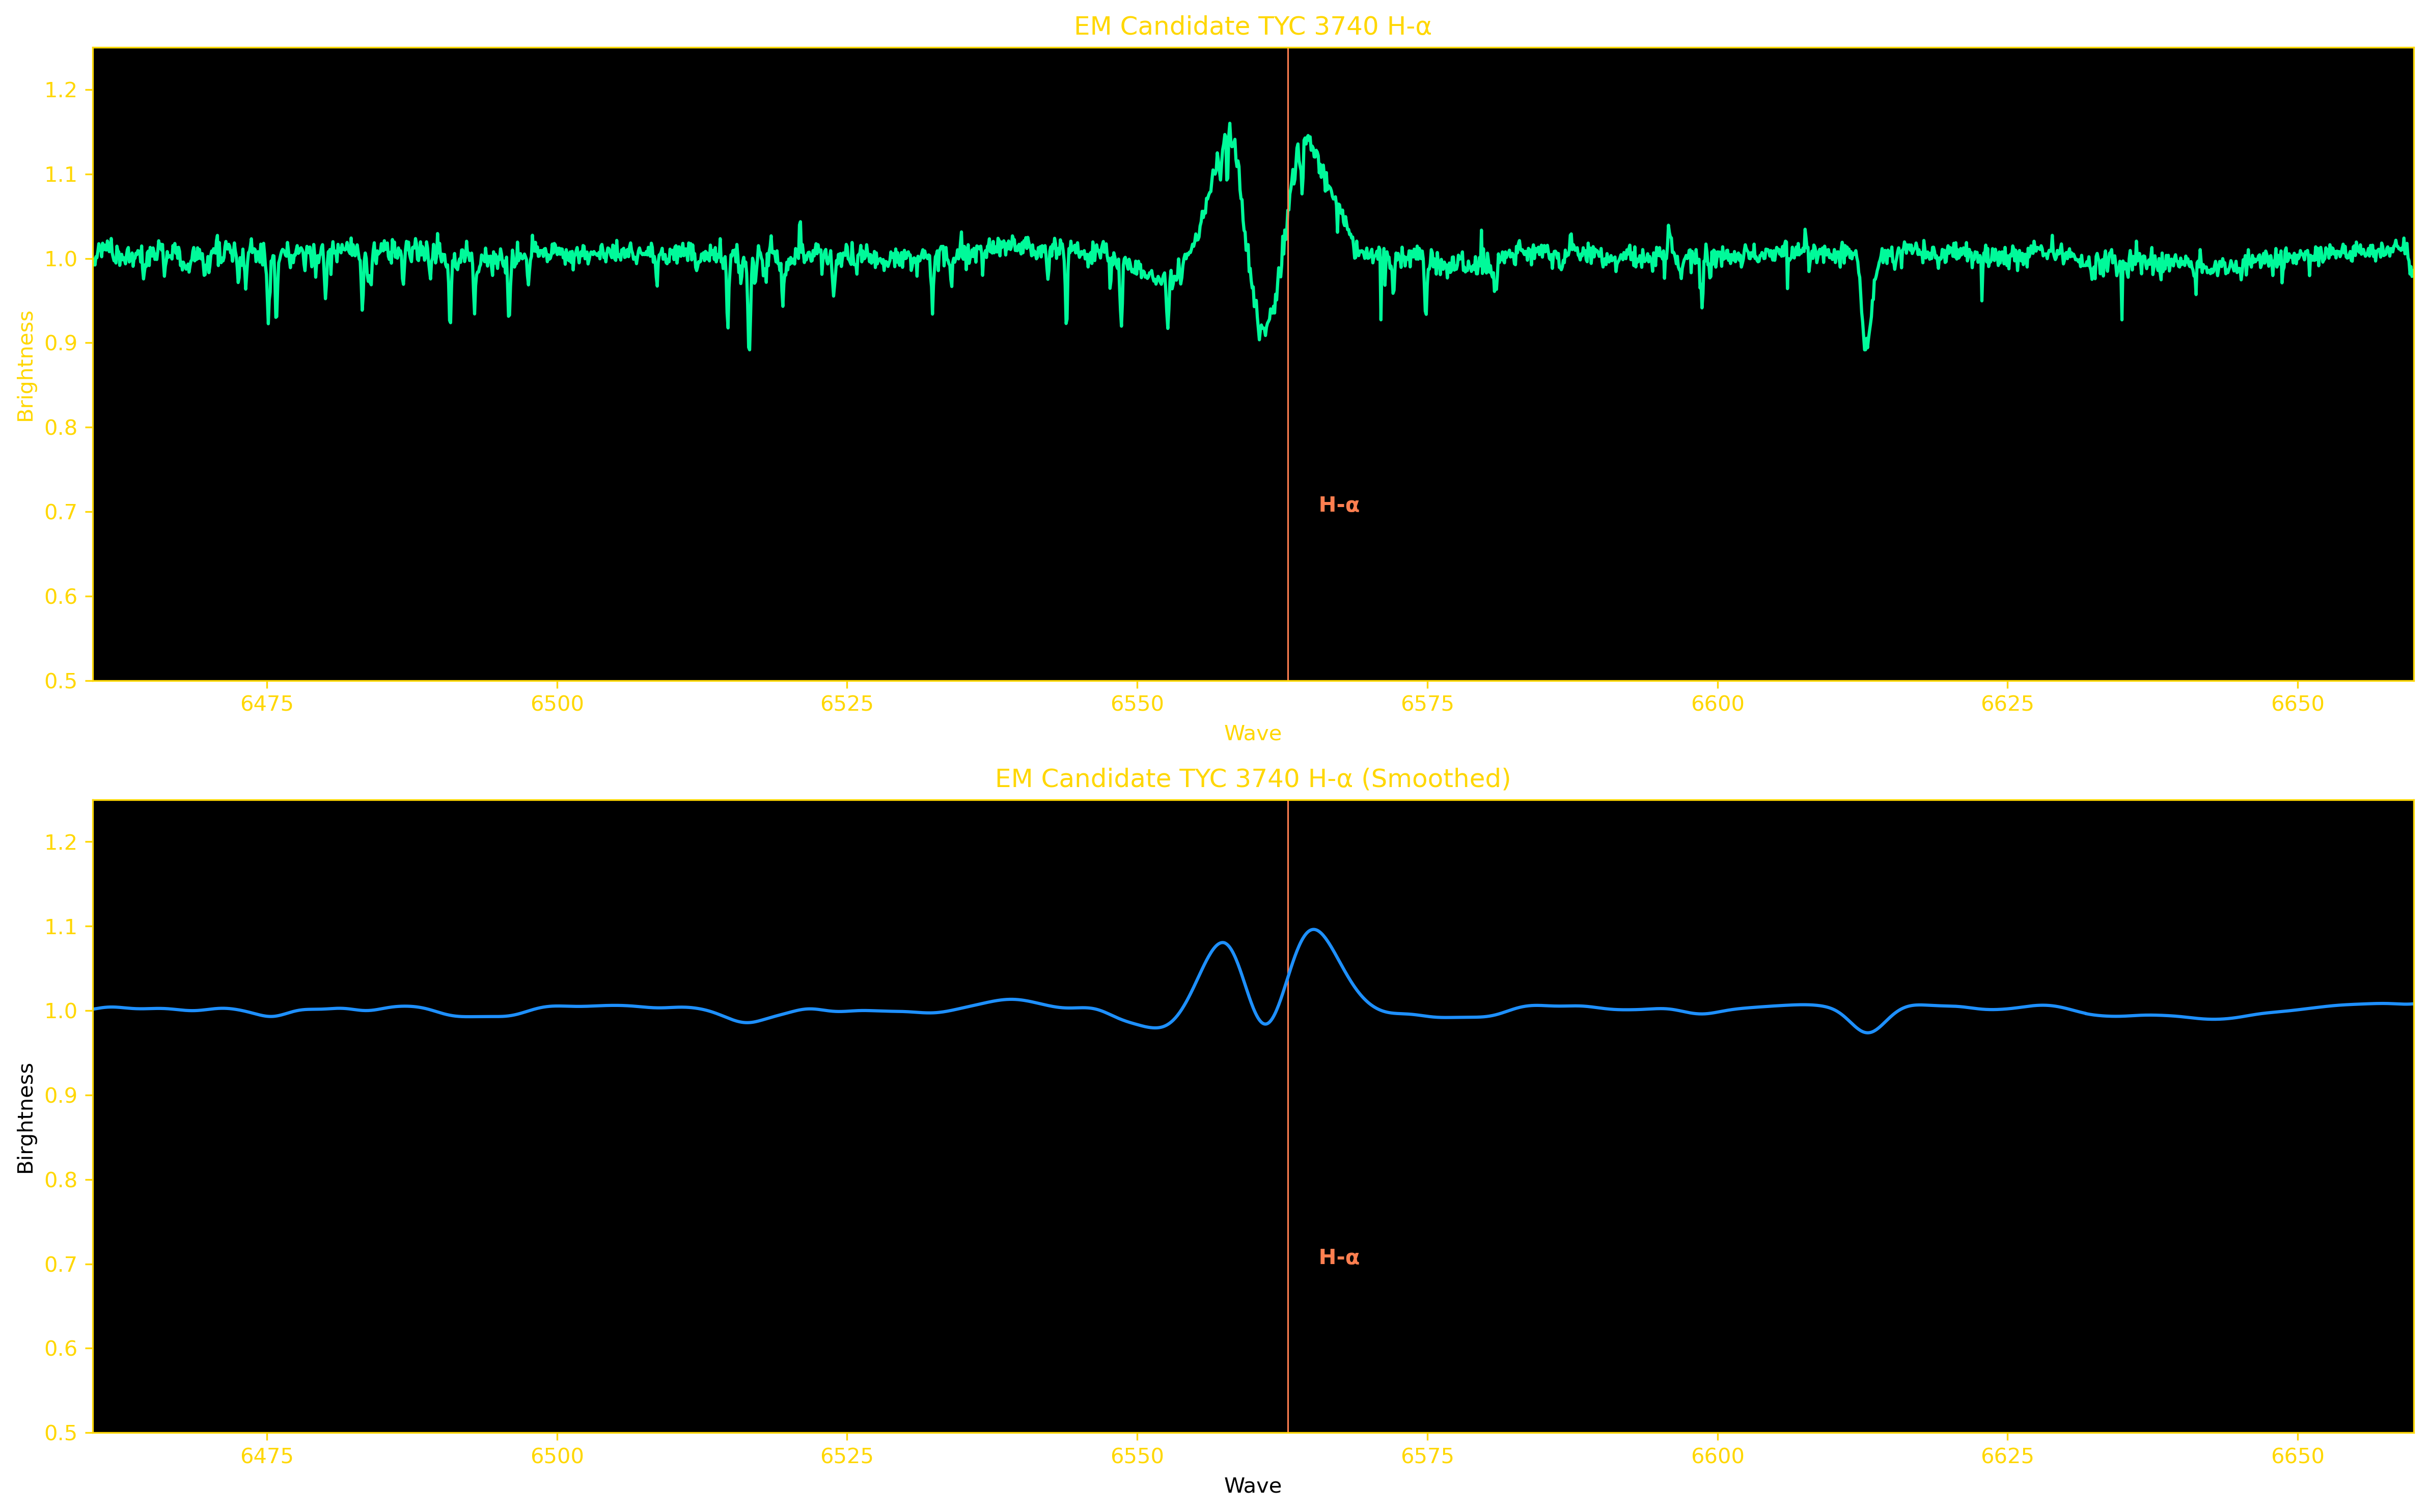

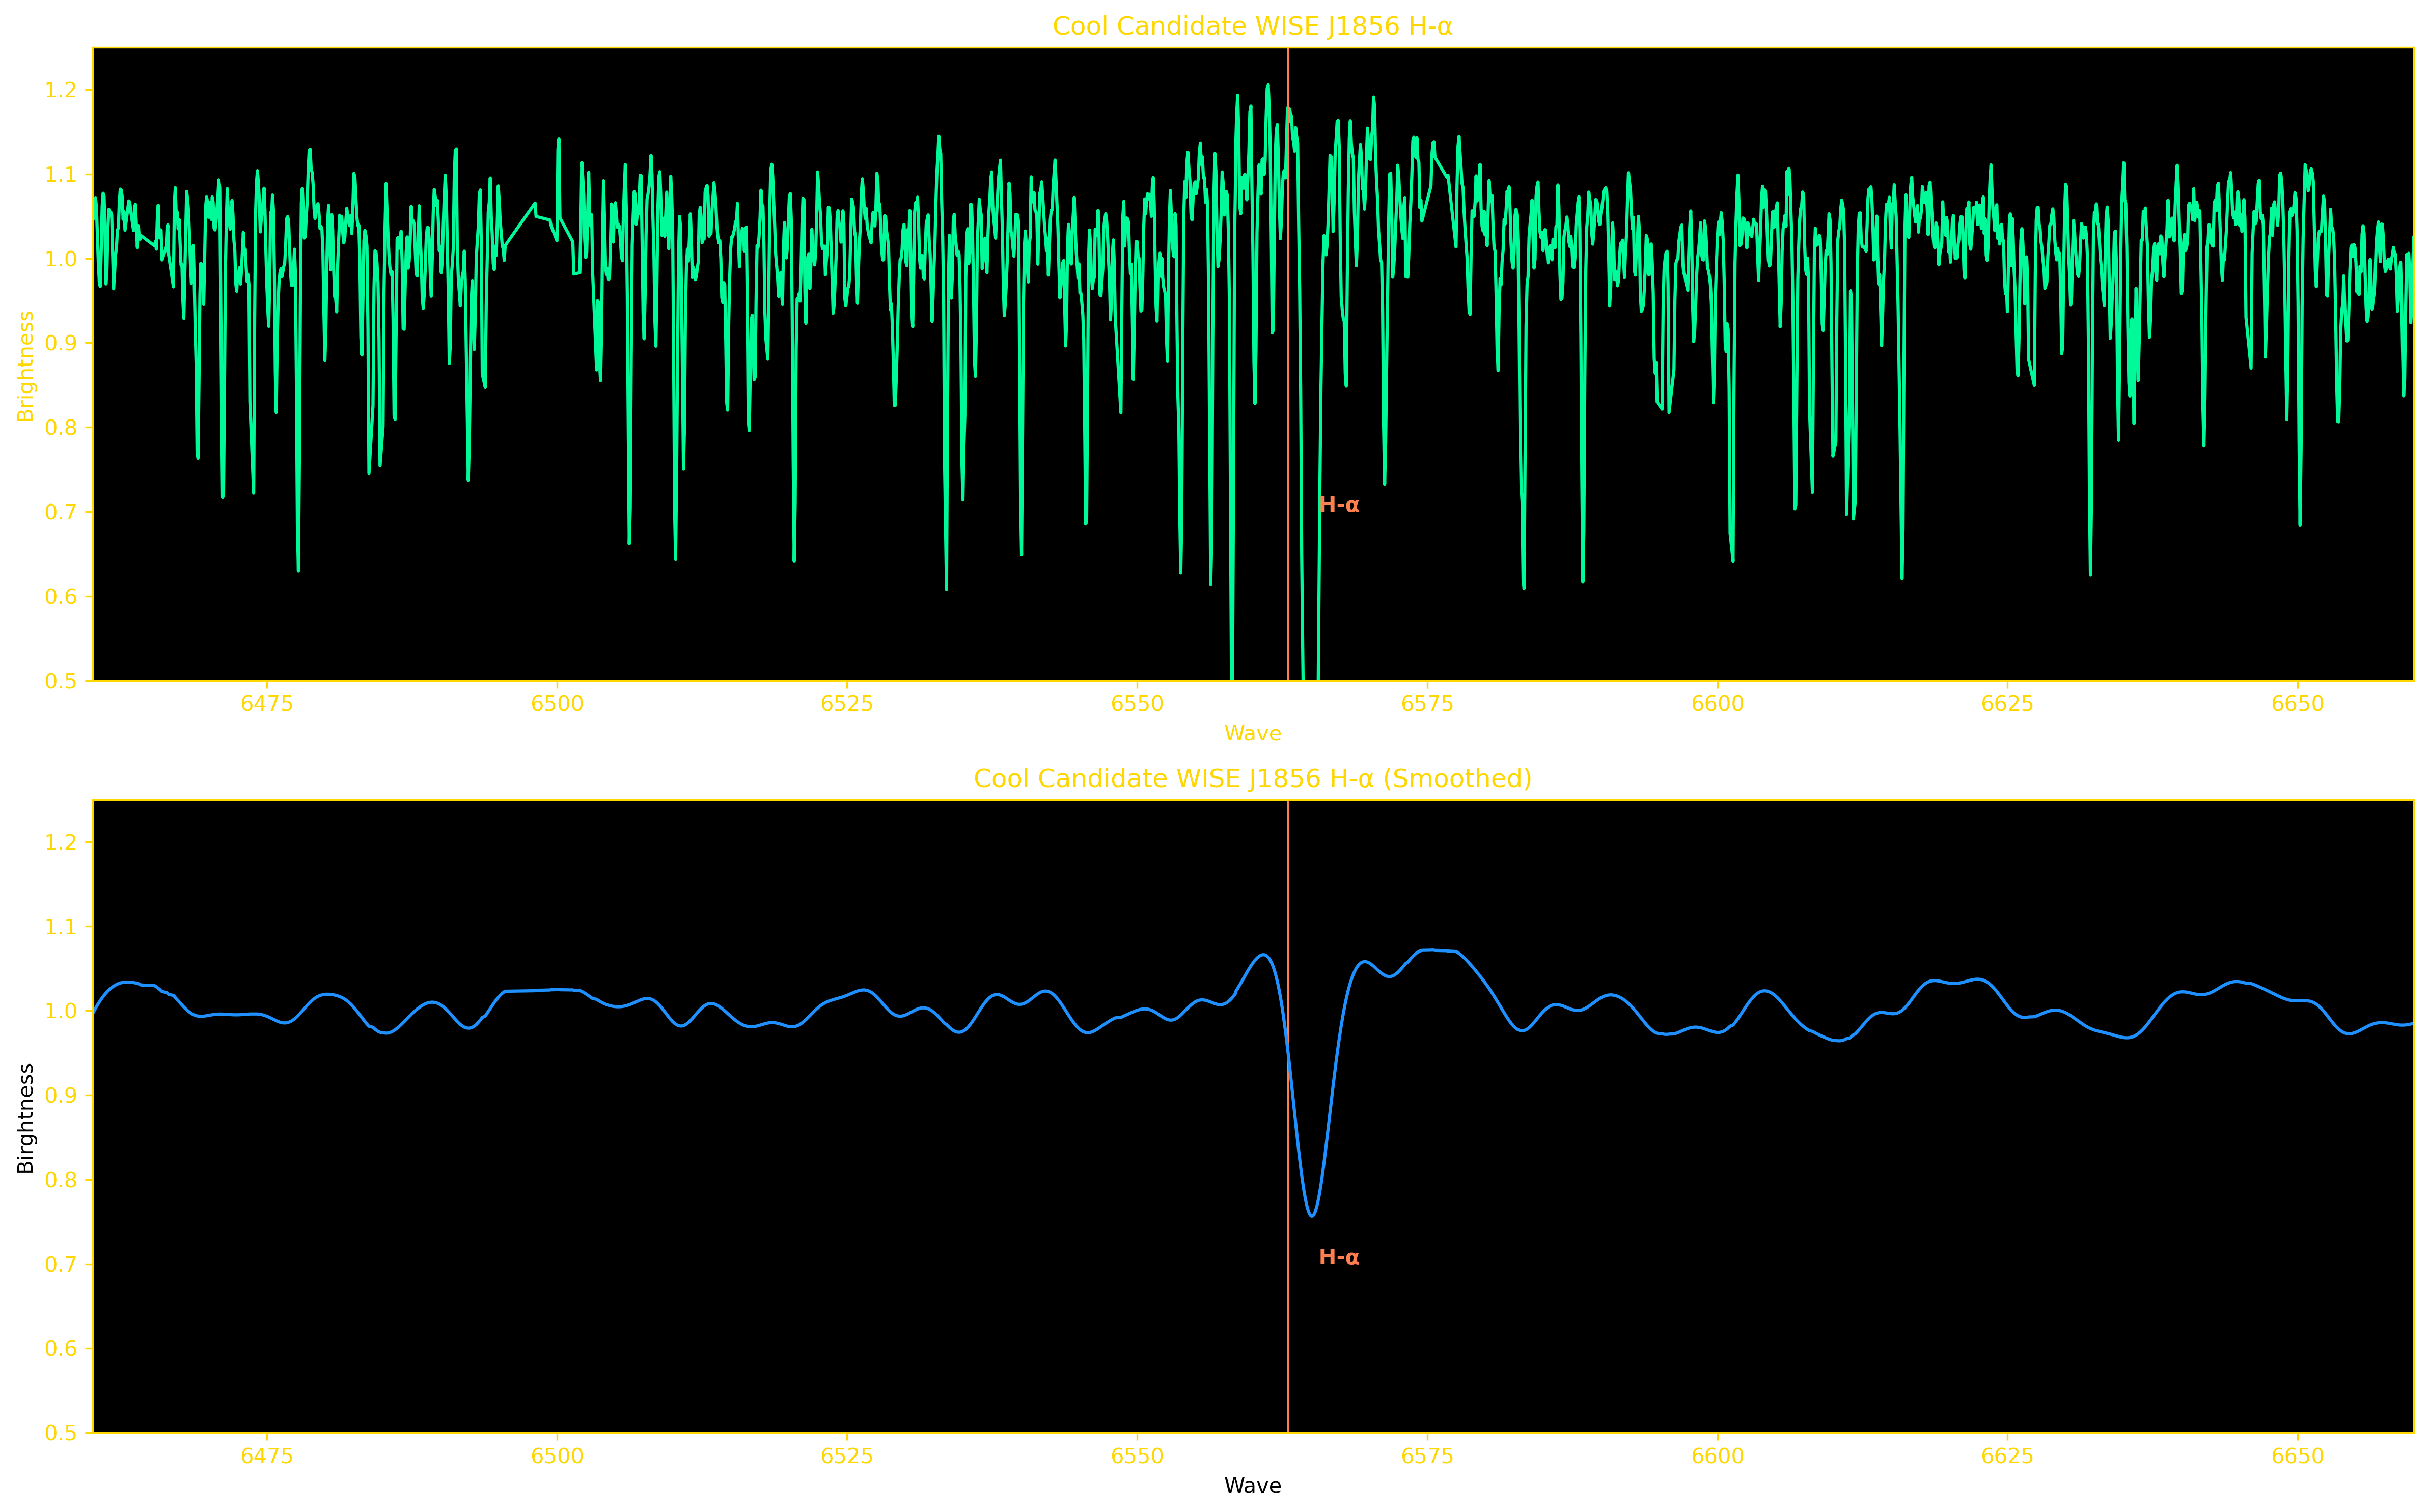

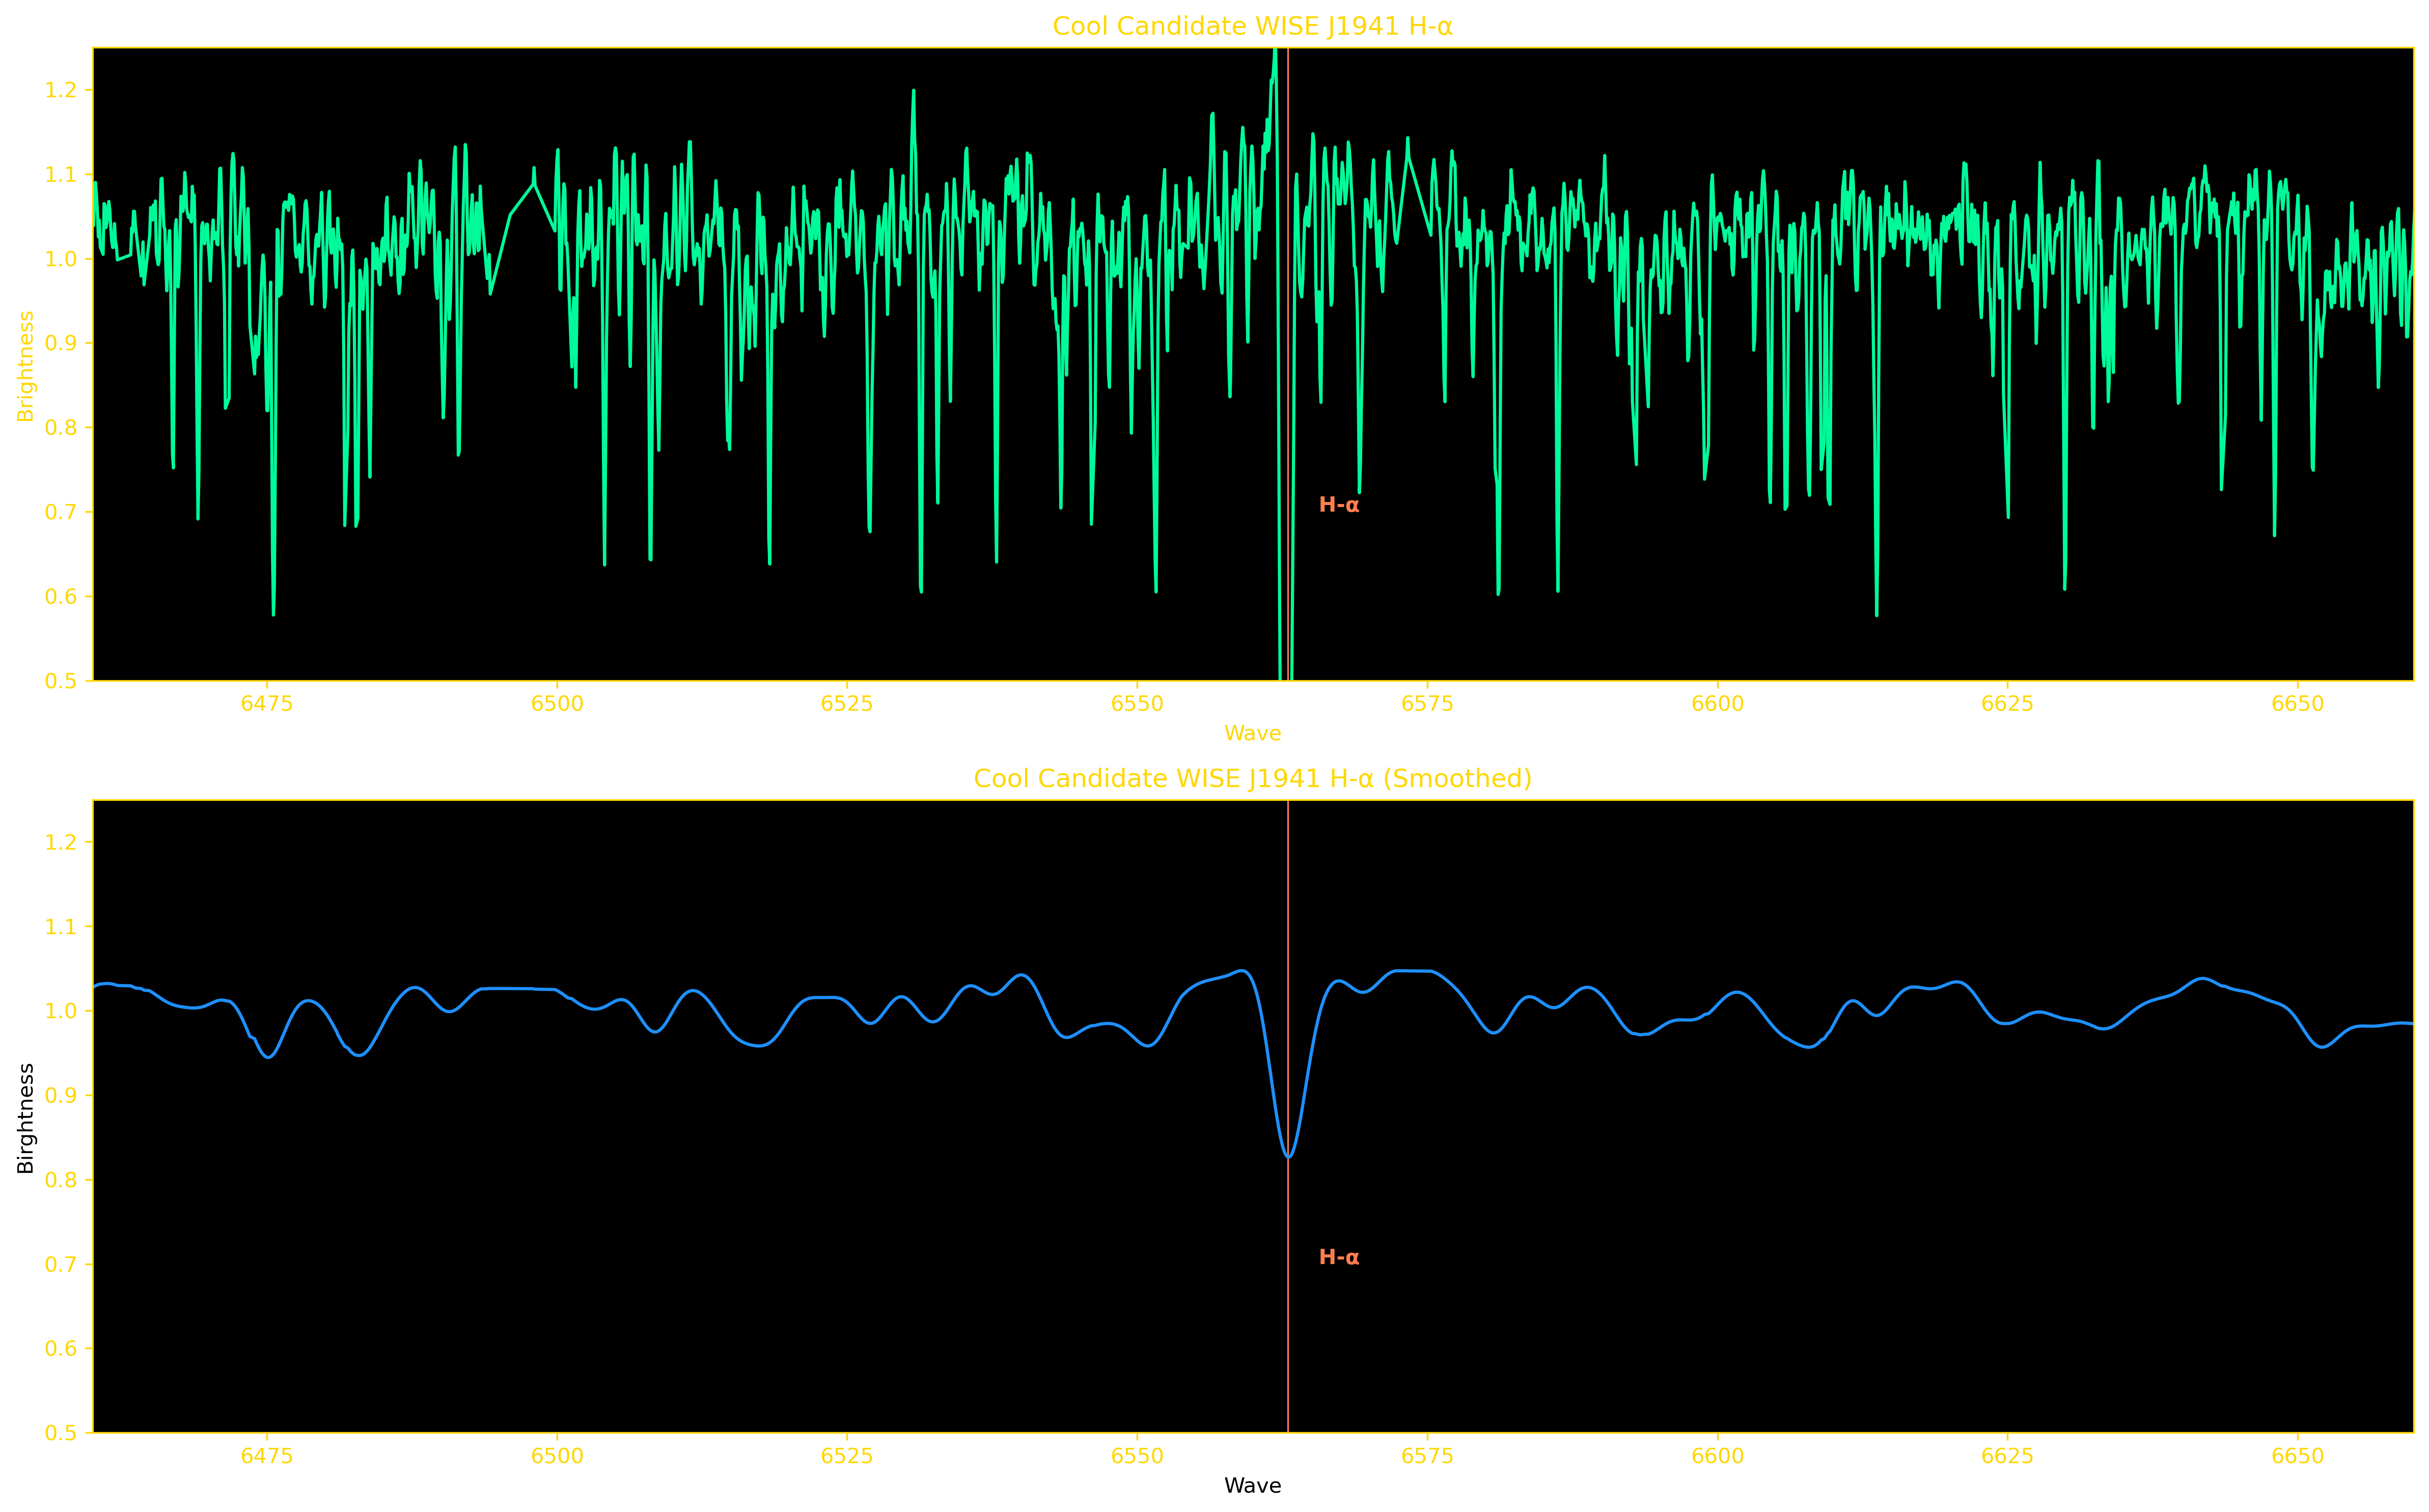

In [16]:
   
# currentFocus = "Full Spectra"
# leftBound = 3600
# rightBound = 10430
# bottomLim= 0
# topLim= 2
# RapidChartSpitter(tyc2670,21,currentFocus,'EM',0.75,leftBound,rightBound,bottomLim,topLim)
# RapidChartSpitter(tyc3740,21,currentFocus,'EM',0.75,leftBound,rightBound,bottomLim,topLim)
# RapidChartSpitter(wisej1856,21,currentFocus,'Cool',0.75,leftBound,rightBound,bottomLim,topLim)
# RapidChartSpitter(wisej1941,21,currentFocus,'Cool',0.75,leftBound,rightBound,bottomLim,topLim)
bunny()
currentFocus = "Balmer Series"
leftBound = 4000
rightBound = 6960
bottomLim= 0.6
topLim= 1.25
RapidChartSpitter(tyc2670,17,currentFocus,'EM',0.75,leftBound,rightBound,bottomLim,topLim)
RapidChartSpitter(tyc3740,17,currentFocus,'EM',0.75,leftBound,rightBound,bottomLim,topLim)
RapidChartSpitter(wisej1856,17,currentFocus,'Cool',0.75,leftBound,rightBound,bottomLim,topLim)
RapidChartSpitter(wisej1941,17,currentFocus,'Cool',0.75,leftBound,rightBound,bottomLim,topLim)
bunny()
currentFocus = "H-α"
leftBound = 6460
rightBound = 6660
bottomLim= 0.5
topLim= 1.25
RapidChartSpitter(tyc2670,17,currentFocus,'EM',0.75,leftBound,rightBound,bottomLim,topLim)
RapidChartSpitter(tyc3740,17,currentFocus,'EM',0.75,leftBound,rightBound,bottomLim,topLim)
RapidChartSpitter(wisej1856,17,currentFocus,'Cool',0.75,leftBound,rightBound,bottomLim,topLim)
RapidChartSpitter(wisej1941,17,currentFocus,'Cool',0.75,leftBound,rightBound,bottomLim,topLim)
bunny()
# currentFocus = "Ca Triplet"
# leftBound = 8400
# rightBound = 8750
# bottomLim= 0
# topLim= 2
# RapidChartSpitter(tyc2670,17,currentFocus,'EM',0.75,leftBound,rightBound,bottomLim,topLim)
# RapidChartSpitter(tyc3740,17,currentFocus,'EM',0.75,leftBound,rightBound,bottomLim,topLim)
# RapidChartSpitter(wisej1856,17,currentFocus,'Cool',0.75,leftBound,rightBound,bottomLim,topLim)
# RapidChartSpitter(wisej1941,17,currentFocus,'Cool',0.75,leftBound,rightBound,bottomLim,topLim)
# bunny()
# currentFocus = "G-Band,Fe Line,and H-γ"
# leftBound = 4300
# rightBound = 4370
# bottomLim= 0
# topLim= 2
# RapidChartSpitter(tyc2670,21,currentFocus,'EM',0.75,leftBound,rightBound,bottomLim,topLim)
# RapidChartSpitter(tyc3740,21,currentFocus,'EM',0.75,leftBound,rightBound,bottomLim,topLim)
# RapidChartSpitter(wisej1856,21,currentFocus,'Cool',0.75,leftBound,rightBound,bottomLim,topLim)
# RapidChartSpitter(wisej1941,21,currentFocus,'Cool',0.75,leftBound,rightBound,bottomLim,topLim)
bunny()
# currentFocus = "He 4481"
# leftBound = 4440
# rightBound = 4520
# bottomLim= 0
# topLim= 2
# RapidChartSpitter(tyc2670,21,currentFocus,'EM',0.75,leftBound,rightBound,bottomLim,topLim)
# RapidChartSpitter(tyc3740,21,currentFocus,'EM',0.75,leftBound,rightBound,bottomLim,topLim)
# RapidChartSpitter(wisej1856,21,currentFocus,'Cool',0.75,leftBound,rightBound,bottomLim,topLim)
# RapidChartSpitter(wisej1941,21,currentFocus,'Cool',0.75,leftBound,rightBound,bottomLim,topLim)
bunny()

In [10]:
# currentFocus = "G-Band,Fe Line,and H-γ"
# leftBound = 427
# rightBound = 440
# RapidChartSpitter(tyc2670,21,currentFocus,'EM',0.5,leftBound,rightBound)
# RapidChartSpitter(tyc3740,21,currentFocus,'EM',0.5,leftBound,rightBound)
# RapidChartSpitter(wisej1856,21,currentFocus,'Cool',0.5,leftBound,rightBound)
# RapidChartSpitter(wisej1941,21,currentFocus,'Cool',0.5,leftBound,rightBound)
# bunny()